In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [92]:
df = pd.read_excel('../GlobalinkPlan.xlsx')
df.iloc[0,0] = 'Verify bidirectional conversion'
df.iloc[1,0] = 'Investigate fluorescence noise'
df.iloc[2,0] = 'Build entangled photon source'

In [93]:
start_date = df.Start.min()

#days from project start to task
df['start_num'] = (df.Start-start_date).dt.days

#days from proj start to end of task
df['end_num'] = (df.End - start_date).dt.days

# days between start and end of each tast 
df['days_start_to_end'] = df.end_num - df.start_num

df['color'] = ['royalblue', 'royalblue', 'royalblue']
df.Task 
df

,Task,Start,End,start_num,end_num,days_start_to_end,color
0,Verify bidirectional conversion,2022-09-19,2022-10-21,0,32,32,royalblue
1,Investigate fluorescence noise,2022-10-21,2022-11-04,32,46,14,royalblue
2,Build entangled photon source,2022-11-04,2022-12-20,46,92,46,royalblue


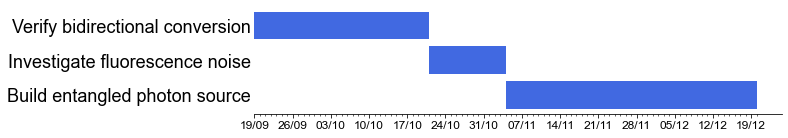

In [94]:
cm = 1/2.54
fig, ax = plt.subplots(1, figsize=(24*cm, 5*cm))

ax.barh(df.Task, df.days_start_to_end, left = df.start_num, color=df.color)

xticks=np.arange(0, df.end_num.max()+1, 7)
xticks_labels = pd.date_range(start_date, end=df.End.max()).strftime("%d/%m")
xticks_minor = np.arange(0, df.end_num.max()+1,1)

ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::7], fontsize=12)
ax.invert_yaxis()

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.tick_params(axis='y', length=0)
plt.show()